AEDE-Análise exploratória de dados espaciais 

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Locale: Utilizado para formatação de datas, valores, dias de acordo com a região que queremos.
import locale 
#Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
#futuras atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore") 
from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster


# Fonte dos dados: http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

In [58]:
#comando utilizado para exibir todas as colunas
pd.set_option('display.max_columns',None)

In [59]:
# Criando variavel principal
roubos_celulares=pd.read_excel('dados_roubo celulares_sp_outubro_2022.xlsx')

In [60]:
# Aqui estamos verificando as informações das primeiras colunas
roubos_celulares.head()


,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2022,1710085,1710085/2022,A NOITE,Desconhecida,Não,NaN,RUA PARATINGA,81.0,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,1.0,Samsung
1,2022,2381,2381/2022,A NOITE,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272.0,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,1.0,Apple
2,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970.0,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Apple
3,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970.0,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Samsung
4,2022,134311,134311/2022,A NOITE,Desconhecida,Não,NaN,RUA DENIS FURTEL,91.0,PEDREIRA,S.PAULO,SP,-23.704287,-46.628890,Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DELEGACIA ELETRONICA 1,98º D.P. JARDIM MIRIAM,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi


In [61]:
# verificar como estão organizados os dados de latidute e  longitude no nosso mapa
roubos_celulares[['LATITUDE','LONGITUDE']]


,LATITUDE,LONGITUDE
0,-23.702040,-46.620427
1,-23.666840,-46.722660
2,-22.936142,-47.088884
3,-22.936142,-47.088884
4,-23.704287,-46.628890
...,...,...
24300,-23.552322,-46.646097
24301,-23.548481,-46.642623
24302,-23.626642,-46.648828
24303,-23.651202,-46.575947


In [62]:
#aqui estamos vendo as informaões dos dados de Latitude e longitude e se temos valores nulos 
roubos_celulares[['LATITUDE','LONGITUDE']].info()
roubos_celulares[['LATITUDE','LONGITUDE']].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24305 entries, 0 to 24304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   21324 non-null  float64
 1   LONGITUDE  21324 non-null  float64
dtypes: float64(2)
memory usage: 379.9 KB


LATITUDE     2981
LONGITUDE    2981
dtype: int64

In [63]:
#Aqui estamos tirando do nosos conjunto de dados as linhas com valores nulos
# em seguida estamos vizualizando se o procedimento foi realizado de fato
roubos_celulares=roubos_celulares.dropna(subset= ['LATITUDE','LONGITUDE'])
roubos_celulares[['LATITUDE','LONGITUDE']].info()
roubos_celulares[['LATITUDE','LONGITUDE']].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21324 entries, 0 to 24304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   21324 non-null  float64
 1   LONGITUDE  21324 non-null  float64
dtypes: float64(2)
memory usage: 499.8 KB


LATITUDE     0
LONGITUDE    0
dtype: int64

In [64]:
# com os dados limpos, vamos criar uma georeferencia para nosso conjunto de dados:
roubos_celulares['geometry'] = None

for index, row in roubos_celulares.iterrows():
    roubos_celulares.loc[index,'geometry'] = Point(row.LONGITUDE,row.LATITUDE)

In [65]:
# vamos verificar se foi criada uma nova coluna geometry no nosso DataSet
roubos_celulares.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2022,1710085,1710085/2022,A NOITE,Desconhecida,Não,NaN,RUA PARATINGA,81.0,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,1.0,Samsung,POINT (-46.6204273 -23.70204035)
1,2022,2381,2381/2022,A NOITE,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272.0,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,1.0,Apple,POINT (-46.7226596 -23.66683992)
2,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970.0,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Apple,POINT (-47.0888835 -22.936142)
3,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970.0,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Samsung,POINT (-47.0888835 -22.936142)
4,2022,134311,134311/2022,A NOITE,Desconhecida,Não,NaN,RUA DENIS FURTEL,91.0,PEDREIRA,S.PAULO,SP,-23.704287,-46.628890,Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DELEGACIA ELETRONICA 1,98º D.P. JARDIM MIRIAM,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi,POINT (-46.62889 -23.70428665)


<AxesSubplot:>

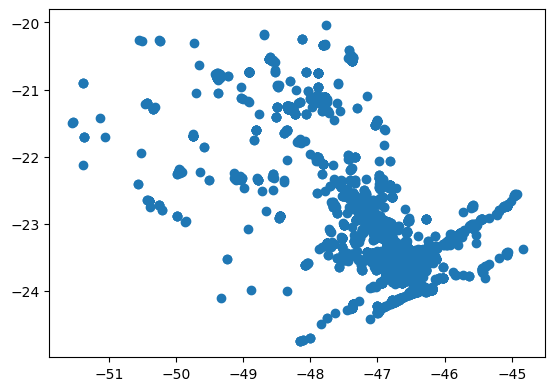

In [66]:
# Agora vamos mostrar os dados gerados a cima
gdf_rcelulares=gpd.GeoDataFrame(roubos_celulares,geometry='geometry')
gdf_rcelulares.plot()

In [67]:
type(gdf_rcelulares)

geopandas.geodataframe.GeoDataFrame

In [68]:
# vamos filtar pelas regiões onde mais ocorream crimes
roubos_celulares['CIDADE'].value_counts()


S.PAULO                11879
S.BERNARDO DO CAMPO      763
GUARULHOS                718
S.ANDRE                  646
OSASCO                   485
                       ...  
ANALANDIA                  1
CACHOEIRA PAULISTA         1
ITAPEVA                    1
AGUDOS                     1
S.SIMAO                    1
Name: CIDADE, Length: 236, dtype: int64

<AxesSubplot:>

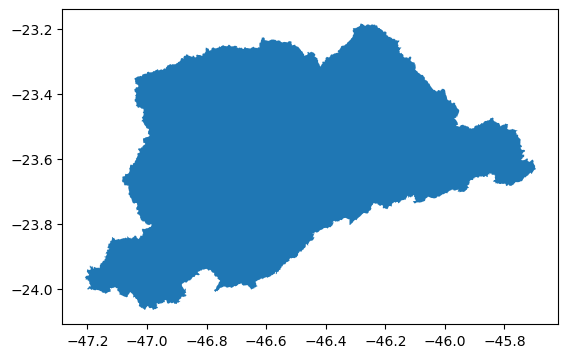

In [69]:
#importando gelocalização das regiões que contemplam a região da grande SP
gdf_municipios= gpd.read_file('geolocalição_grande_sp.json', driver= 'GeoJSON')
gdf_municipios.plot()


In [70]:
#transformando variavel no tipo polygon
polygon_Mapa=gdf_municipios.iloc[0].geometry

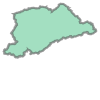

In [71]:
polygon_Mapa

In [72]:
type(polygon_Mapa)

shapely.geometry.polygon.Polygon

In [73]:
#cruzando os dados com o polygon da região da grande SP
gfd_dados_cruzados=gdf_rcelulares[gdf_rcelulares.intersects(polygon_Mapa)]

<AxesSubplot:>

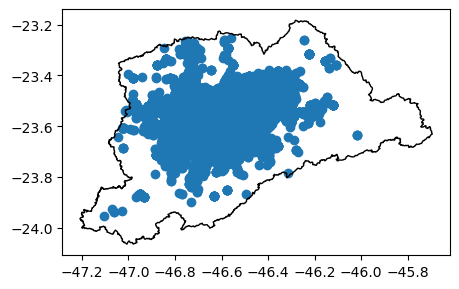

In [74]:
#mostrando os dados cruzados a cima 
fig, ax= plt.subplots(figsize=(5,5))
gfd_dados_cruzados.plot(ax=ax)
gdf_municipios.plot(ax=ax, facecolor='none',edgecolor='black')

In [75]:
gfd_dados_cruzados.crs = "epsg:4326"
gfd_dados_cruzados =gfd_dados_cruzados.to_crs(epsg=3857)

In [76]:
gfd_dados_cruzados.to_file('dados_cruzados_df_geo.Json',driver='GeoJSON')

In [77]:
gdf_dados_cruzados= gpd.read_file('dados_cruzados_df_geo.Json',driver='GeoJSON')
gdf_dados_cruzados.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2022,1710085,1710085/2022,A NOITE,Desconhecida,Não,None,RUA PARATINGA,81.0,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,None,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,None,Consumado,None,None,None,None,None,NaT,NaN,None,None,None,None,None,None,None,None,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,1.0,Samsung,POINT (-5189762.228 -2717142.234)
1,2022,2381,2381/2022,A NOITE,Desconhecida,Não,None,RUA JOSE RAFAELLI,272.0,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,None,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,None,Consumado,None,None,None,None,None,NaT,NaN,None,None,None,None,None,None,None,None,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,1.0,Apple,POINT (-5201142.675 -2712863.335)
2,2022,134311,134311/2022,A NOITE,Desconhecida,Não,None,RUA DENIS FURTEL,91.0,PEDREIRA,S.PAULO,SP,-23.704287,-46.628890,Via pública,None,ENCAMINHAMENTO DP ÁREA DO FATO,DELEGACIA ELETRONICA 1,98º D.P. JARDIM MIRIAM,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,None,Consumado,None,None,None,None,None,NaT,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,1.0,Xiaomi,POINT (-5190704.291 -2717415.329)
3,2022,134301,134301/2022,A NOITE,Desconhecida,Não,None,PRAÇA ARMENIA,1.0,BOM RETIRO,S.PAULO,SP,-23.526785,-46.631089,Via pública,None,ENCAMINHAMENTO DP ÁREA DO FATO,DELEGACIA ELETRONICA 1,02º D.P. BOM RETIRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - TRANSEUNTE,None,Consumado,None,None,None,None,None,NaT,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0,0.0,None,1.0,Samsung,POINT (-5190949.094 -2695849.936)
4,2022,1710093,1710093/2022,A NOITE,Desconhecida,Não,None,Avenida Carlos Caldeira Filho,31.0,Vila Prel,S.PAULO,SP,-23.645960,-46.753704,Via pública,None,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,37º D.P. CAMPO LIMPO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,None,Consumado,None,None,None,None,None,NaT,NaN,None,None,None,None,None,None,None,None,GEA7G37,SP,S.PAULO,Azul,YAMAHA/FZ25 FAZER,2022.0,NaN,MOTOCICLO,1.0,Outros,POINT (-5204598.533 -2710325.744)


In [78]:
fmap=folium.Map()
fmap



In [85]:
media_longitude=gfd_dados_cruzados['LONGITUDE'].mean()
media_latitude=gfd_dados_cruzados['LATITUDE'].mean()

In [86]:
fmap=folium.Map(location=[media_latitude,media_longitude])
mc= FastMarkerCluster(gfd_dados_cruzados[['LATITUDE','LONGITUDE']])
fmap.add_child(mc)
fmap

In [87]:
gdf_municipios

,SIGLA_UF,CD_MUN,NM_MUN,AREA_KM2,geometry
0,SP,3503901,Arujá,96.167,"POLYGON ((-45.96191 -23.49705, -45.96180 -23.4..."


In [88]:
fmap=folium.Map(location=[media_latitude,media_longitude])
limites= folium.features.GeoJson(gdf_municipios)
fmap.add_child(limites)

mc= FastMarkerCluster(gfd_dados_cruzados[['LATITUDE','LONGITUDE']])


fmap.add_child(mc)
fmap

In [89]:
fmap.save('mapa_roubo_celulares_regioes_sp.html')

In [90]:
gfd_dados_cruzados.describe()

,ANO_BO,NUM_BO,NUMERO,LATITUDE,LONGITUDE,EXAME,IDADE,CORCUTIS,RELACIONAMENTO,PARENTESCO,ANO_FABRICACAO,ANO_MODELO,QUANT_CELULAR
count,17376.0,1.737600e+04,1.737600e+04,17376.000000,17376.000000,0.0,33.000000,0.0,0.0,0.0,17311.000000,16826.000000,17356.000000
mean,2022.0,7.131374e+05,6.773348e+04,-23.575250,-46.606940,NaN,32.242424,NaN,NaN,NaN,412.233089,366.068406,1.086829
std,0.0,8.595384e+05,8.538663e+06,0.086535,0.140625,NaN,19.659651,NaN,NaN,NaN,813.090753,777.239570,3.594869
min,2022.0,5.700000e+01,0.000000e+00,-23.954317,-47.107027,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,2022.0,4.363000e+03,7.275000e+01,-23.639045,-46.699474,NaN,19.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
50%,2022.0,7.807000e+04,2.400000e+02,-23.563153,-46.626311,NaN,22.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
75%,2022.0,1.765443e+06,7.150000e+02,-23.521880,-46.510718,NaN,40.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
max,2022.0,1.871864e+06,1.125239e+09,-23.253951,-46.018188,NaN,81.000000,NaN,NaN,NaN,2022.000000,2023.000000,300.000000


In [102]:
roubos_celulares.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
0,2022,1710085,1710085/2022,A NOITE,Desconhecida,Não,NaN,RUA PARATINGA,81.0,CONCEICAO,DIADEMA,SP,-23.702040,-46.620427,Via pública,NaN,BO PARA INVESTIGAÇÃO,DELEGACIA ELETRONICA,01º D.P. DIADEMA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DXF9J96,SP,DIADEMA,Vermelho,I/TOYOTA COROLLA,2022.0,NaN,AUTOMOVEL,1.0,Samsung,POINT (-46.62043 -23.70204)
1,2022,2381,2381/2022,A NOITE,Desconhecida,Não,NaN,RUA JOSE RAFAELLI,272.0,SOCORRO,S.PAULO,SP,-23.666840,-46.722660,Via pública,NaN,BO PARA INVESTIGAÇÃO,102º D.P. SOCORRO,102º D.P. SOCORRO,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FNW7B16,SP,S.PAULO,Branco,HONDA/ADV 150,2021.0,2022.0,MOTONETA,1.0,Apple,POINT (-46.72266 -23.66684)
2,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970.0,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Apple,POINT (-47.08888 -22.93614)
3,2022,7423,7423/2022,A NOITE,Conhecida,Sim,NaN,Avenida Senador Lacerda Franco,970.0,Jardim do Lago,CAMPINAS,SP,-22.936142,-47.088884,Via pública,NaN,BO PARA FLAGRANTE,PLANTÃO - 01 DP CAMPINAS,02º D.P. CAMPINAS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBT1A77,SP,CAMPINAS,Preta,I/TOYOTA HILUX CDSRXA4FD,2022.0,2022.0,CAMINHONETE,1.0,Samsung,POINT (-47.08888 -22.93614)
4,2022,134311,134311/2022,A NOITE,Desconhecida,Não,NaN,RUA DENIS FURTEL,91.0,PEDREIRA,S.PAULO,SP,-23.704287,-46.628890,Via pública,NaN,ENCAMINHAMENTO DP ÁREA DO FATO,DELEGACIA ELETRONICA 1,98º D.P. JARDIM MIRIAM,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Xiaomi,POINT (-46.62889 -23.70429)


In [104]:
#cidade mais violenta 
roubos_celulares.CIDADE.max()

'VOTORANTIM'

In [107]:
#mostrando as cidades onde mais ocorreram roubo de celulares
#roubos_celulares.sort_values('CIDADE',ascending= False).head()

In [110]:
roubos_celulares.query('QUANT_CELULAR >2')

,ANO_BO,NUM_BO,NUMERO_BOLETIM,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,TIPOPESSOA,VITIMAFATAL,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO,PARENTESCO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
371,2022,5513,5513/2022,A TARDE,Conhecida,Não,NaN,RUA TIBURCIO DE SOUSA,340.0,ITAIM PAULISTA,S.PAULO,SP,-23.516286,-46.389524,Comércio e serviços,NaN,BO PARA INVESTIGAÇÃO,50º D.P. ITAIM PAULISTA,50º D.P. ITAIM PAULISTA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - ESTABELECIMENTO COMERCIAL,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,3.0,Outros,POINT (-46.38952 -23.51629)
372,2022,5513,5513/2022,A TARDE,Conhecida,Não,NaN,RUA TIBURCIO DE SOUSA,340.0,ITAIM PAULISTA,S.PAULO,SP,-23.516286,-46.389524,Comércio e serviços,NaN,BO PARA INVESTIGAÇÃO,50º D.P. ITAIM PAULISTA,50º D.P. ITAIM PAULISTA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - ESTABELECIMENTO COMERCIAL,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,4.0,Motorola,POINT (-46.38952 -23.51629)
373,2022,5513,5513/2022,A TARDE,Conhecida,Não,NaN,RUA TIBURCIO DE SOUSA,340.0,ITAIM PAULISTA,S.PAULO,SP,-23.516286,-46.389524,Comércio e serviços,NaN,BO PARA INVESTIGAÇÃO,50º D.P. ITAIM PAULISTA,50º D.P. ITAIM PAULISTA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - ESTABELECIMENTO COMERCIAL,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,4.0,Positivo,POINT (-46.38952 -23.51629)
374,2022,5513,5513/2022,A TARDE,Conhecida,Não,NaN,RUA TIBURCIO DE SOUSA,340.0,ITAIM PAULISTA,S.PAULO,SP,-23.516286,-46.389524,Comércio e serviços,NaN,BO PARA INVESTIGAÇÃO,50º D.P. ITAIM PAULISTA,50º D.P. ITAIM PAULISTA,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - ESTABELECIMENTO COMERCIAL,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,4.0,Samsung,POINT (-46.38952 -23.51629)
1580,2022,3184,3184/2022,DE MADRUGADA,Desconhecida,Não,NaN,Avenida José Brumatti,0.0,Jardim Santo Expedito,GUARULHOS,SP,-23.415579,-46.453425,Via pública,NaN,APRECIAÇÃO DO DELEGADO TITULAR,07º D.P. GUARULHOS,07º D.P. GUARULHOS,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FXF5I45,SP,GUARULHOS,Vermelho,HONDA/CB 500X,2022.0,2023.0,MOTOCICLO,14.0,Motorola,POINT (-46.45343 -23.41558)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23925,2022,7286,7286/2022,A NOITE,Desconhecida,Não,2837/2022 - 10356,MARGINAL RODOVIA RAPOSO TAVARES,145000.0,RAPOSO TAVARES,S.PAULO,SP,-23.583197,-46.772787,Shopping Center,NaN,BO PARA INVESTIGAÇÃO,89º D.P. JARDIM TABOAO,75º D.P. JARDIM ARPOADOR,Outros - não criminal,Outros não criminal,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,300.0,Outros,POINT (-46.77279 -23.58320)
23927,2022,7286,7286/2022,A NOITE,Desconhecida,Não,2837/2022 - 10356,MARGINAL RODOVIA RAPOSO TAVARES,145000.0,RAPOSO TAVARES,S.PAULO,SP,-23.583197,-46.772787,Shopping Center,NaN,BO PARA INVESTIGAÇÃO,89º D.P. JARDIM TABOAO,75º D.P. JARDIM ARPOADOR,Título II - Patrimônio (arts. 155 a 183),Roubo (art. 157) - OUTROS,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,300.0,Outros,POINT (-46.77279 -23.58320)
24089,2022,1069,1069/2022,PELA

In [97]:
# Aqui estamos descrevendo quais modelos de celulares são os mais furtados por marca.
celulares_por_marca=roubos_celulares.groupby(['MARCA_CELULAR']).size()
celulares_por_marca

MARCA_CELULAR
APPLE            1
Alcatel          8
Apple         4943
Asus           183
BLU             20
Huawei          27
LG             607
Lenovo          18
Microsoft        5
Motorola      5285
Multilaser      44
Nokia           42
Outros         623
Positivo       135
Samsung       7597
Siemens         13
Sony             4
Xiaomi        1738
ZTE              1
dtype: int64

In [10]:
# Aqui apresentamos a quantidade de aparelhos roubados e a frequência com que ocorreu
celulares=roubos_celulares.groupby(['QUANT_CELULAR']).size()
#roubos_celulares.QUANT_CELULAR.value_counts().plot(kind='bar', title=' Periodo Ocorrencia',color = ['#1F77B4', '#FF7F0E']);
celulares

QUANT_CELULAR
1.0      23835
2.0        270
3.0         60
4.0         31
5.0         10
6.0          4
8.0          2
9.0         12
10.0         2
11.0         1
12.0         1
13.0         1
14.0         2
15.0         2
17.0        12
20.0         4
23.0         1
39.0         1
48.0         1
51.0         2
101.0        2
135.0        1
198.0        1
300.0        2
dtype: int64

In [115]:
# Aqui estamos filtrando pelas cinco primeiras cidades de maiores ocorrência
roubos_celulares['CIDADE'].value_counts()


S.PAULO                11879
S.BERNARDO DO CAMPO      763
GUARULHOS                718
S.ANDRE                  646
OSASCO                   485
                       ...  
ANALANDIA                  1
CACHOEIRA PAULISTA         1
ITAPEVA                    1
AGUDOS                     1
S.SIMAO                    1
Name: CIDADE, Length: 236, dtype: int64

In [12]:
# Aqui estamos filtrando por período de  ocorrência 
periodo_oc=roubos_celulares.groupby(['PERIDOOCORRENCIA']).size()
periodo_oc
#roubos_celulares.PERIDOOCORRENCIA.value_counts().plot(kind='bar', title=' Periodo Ocorrencia',color = ['#1F77B4', '#FF7F0E']);

PERIDOOCORRENCIA
A NOITE            10249
A TARDE             4703
DE MADRUGADA        4460
EM HORA INCERTA       95
PELA MANHÃ          4798
dtype: int64

In [13]:
# apresentando os dados por Bairro onde ocorreram os roubos
roubos_celulares['BAIRRO'].value_counts()


CENTRO                   484
Centro                   335
REPUBLICA                327
JABAQUARA                228
CAPAO REDONDO            221
                        ... 
Chácara do Conde           1
VILA MAYOR                 1
ZONA CENTRAL               1
Cidade Morumbi             1
Vila dos Comerciarios      1
Name: BAIRRO, Length: 3412, dtype: int64

In [14]:
# Apresentadno os dados das cinco ruas onde ocorreram maiores  furtos
roubos_celulares['LOGRADOURO'].value_counts()


RUA AMERICO VESPUCCI                 112
ACESSO RODOVIA CASTELO BRANCO         93
RUA COMENDADOR NESTOR PEREIRA         89
RODOVIA PRESIDENTE DUTRA (BR 116)     75
Avenida Ragueb Chohfi                 69
                                    ... 
RUA DA FE                              1
RUA DESEMBARGADOR DO VALE              1
Rua Nilza Maria Pereira Simplicio      1
RUA JOSÉ TEIXEIRA                      1
RUA PEDRO DA SILVEIRA                  1
Name: LOGRADOURO, Length: 9881, dtype: int64

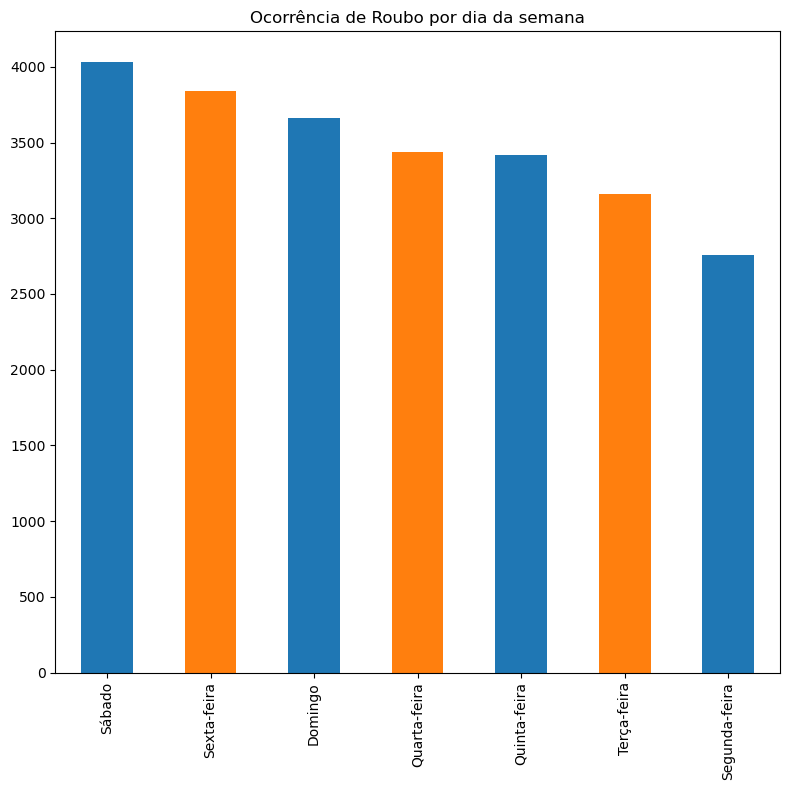

In [15]:
# Agora vamos tratar a variavel DATA_
#trazendo dados para o formato português Brasil
# Transformamos dados apra filtra quais dias da semana possuem maior ocorrência de roubo 
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

roubos_celulares['DATAOCORRENCIA'] =  pd.to_datetime(roubos_celulares['DATAOCORRENCIA'], format= '%d/%m/%Y')
roubos_celulares['DATAOCORRENCIA'] = roubos_celulares['DATAOCORRENCIA'].dt.date
roubos_celulares['ANO_OCORRENCIA'] = pd.DatetimeIndex(roubos_celulares['DATAOCORRENCIA']).year
roubos_celulares['MES_OCORRENCIA'] = pd.DatetimeIndex(roubos_celulares['DATAOCORRENCIA']).month
roubos_celulares['DIA_OCORRENCIA'] = pd.DatetimeIndex(roubos_celulares['DATAOCORRENCIA']).day
roubos_celulares['DIA_SEMANA_OCORRENCIA'] = pd.DatetimeIndex(roubos_celulares['DATAOCORRENCIA']).day_name(locale = 'pt_BR.utf8')

plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
roubos_celulares.DIA_SEMANA_OCORRENCIA.value_counts().plot(kind='bar', title='Ocorrência de Roubo por dia da semana',color = ['#1F77B4', '#FF7F0E']);




In [16]:
from prettytable import PrettyTable